# Convolution Neural Network Loss Functions


## Loss Function Specificity

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    The loss function is the one of the most complex question for training optimization.<br>
    <u>Loss function is a method of evaluating how well your models suit for your task and for your data.</u>
If we form an equation for 1 layer network output as
    $$ err_i=L_i = L\big(y_i , f(\sum_{j=0}^M w_jx_{ij})\big)=L\big(y_i , f(WX_i)\big)= \to min, $$
than $L$ will be our loss function.   
    <blockquote><ul>
    For instance, for $L_2$ criteria $err=1/M \sum_{j=0}^M\big(y_i-f(w_j x_{ij})^2\big)\to min,$<br>
    </blockquote><UL>
    Beside the loss function it can be introduced <b>Cost Function</b> as:
    $$ \rm cost  = L = \sum_{i=0}^{N_b-1}L_i,$$
    where $N_b$ is the batch size.
 <blockquote>        Actually,  as usually <u> the likelihood, log-likelihood, loss function </u> are the same terms, used for one instance, similar to <u>  cost function, measure and score</u> are sum or average (reduction) of loss for all instances in batch.
</ul> 
    <ul> Actually cost reduction can be sum (as above), average or non (vector output).</ul> </UL>
    </blockquote>  
    It can be distinguished <b>The following types of loss functions for the supervised tasks</b>:<ul>
 <li><b>loss functions for classification tasks (categorical output) </b>
 <li><b> and for regression tasks (continuous output range)</b>.
    <br>In the case of classification we can divide:<ul>
    <li><b>Binary Classification</b> (Sigmoid Classification, Logistic Classification) - 1 output (either hypothesis 1 (presence of the target) or 0 (lack of target), - or probability of target presence in the range from 0 to 1.
          <li><b>Multiclass Classification</b> (with excluded labels, SoftMax Classification) - C  outputs,  but we need to choose only one of them (with max value (score), or max probability).
    <li><b>Multilabel Classification </b> (with non-excluded labels), several logistic classifications) - C  outputs, multi-class multi-classification. We have such number of Binary classification as objects we want to find (C). 
    <li><b>Semantic Segmentation</b> Could be considered as pixel-wise multilabel classification, thus output is $C\times W\times H$, where $C$ is the number of classes (channels); $W\times H$ is the size of each channel. 
    </ul>
     <b> In the regression task</b> <u>we have one output for each one value (one parameter) or for one-step forecasting (for each step one output, for instance, for horizon K it would be vector with K outputs)</u>.<br>
     <ul>Actually, we can consider the classification task as specific kind of regression. </ul>
    <br>
    <u>In fact the full loss expression can be combined from several loss functions (including as classification loss as regression one) with its coefficients (penalty)</u>.<ul>
    For instance, 
    $$L_i = (1-p)\rm {MSE}_i + p\rm {BCE}_i$$, 
    where<ul>
        <li>p is the penalty, 
        <li>$\rm MSE_i = \sqrt{\sum_k y_{ik}^2-x_{ik}^2}$
        <li> and $\rm BCE_i = -{\sum_k ( y_{ik}\log(x_{ik}) + (1-y_{ik})\log(1-x_{ik}))}$
    </ul>
    We are alos can combine loss functions for several inputs, <br>
     for instance,  MiniMax GAN:
    $$ L_i = \log D(x_i) + \log(1 – D(G(z_i))),$$
    where<ul>
        <li>$x_i$ is the original input of discriminator network $D(x)$;
        <li>$z_i$ is the noise input of generator network $G(z)$;
    </ul>
<!--     https://arxiv.org/pdf/1711.10337.pdf -->
<!--     https://lilianweng.github.io/lil-log/2017/12/31/object-recognition-for-dummies-part-3.html -->
    <em>Note</em><ul>
When you take deal with a loss function, in general, it is not necessary to pay attention to how calculate the gradient, because on the practice numerical ways for it is applied.
    $$f'(x_0) = \frac{f(x_0+h)−f(x_0−h)}{2h}  $$
     we just need to know that the gradient exist for all terms of loss.
<!--     https://arxiv.org/pdf/1502.05767.pdf -->

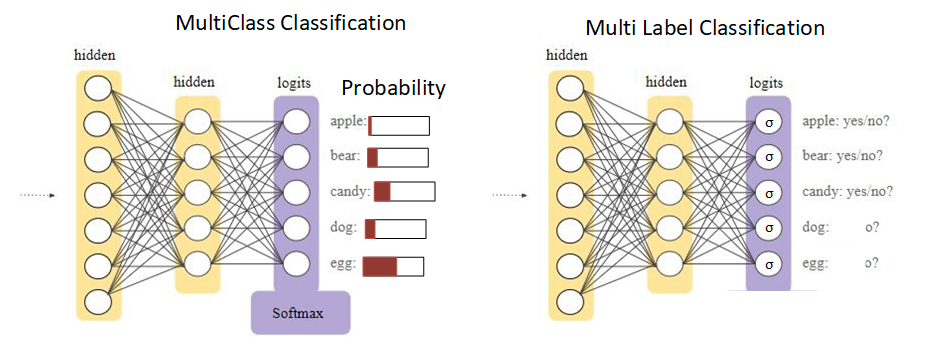

###   Classification Loss

#### General about classification


<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
For the <b> Classification</b>  task we can introduce the loss function as 
    $$L_i = \sum_{c=0}^{C-1} l(y_{ic},\hat{y}_{ic}) = \sum_{c=0}^{C-1}l\big(y_{ic},p(y_{ic})\big)
    ,$$
where 
    <ul>
        <li> $y_{ic}$ is the target class $c$ label for the input data $x_i$;
        <li> $\hat{y_{ic}}=p(y_{ic})$ is the estimation of the probability that input $x_i$ corresponds to the  target class $c$ label; 
        <li> $l$  - measure of similarity between distribution of labels estimations $\hat{y}_{ic}$ and  ground truth $y_{ic}$.
  </ul>            
<em>Note</em> <ul>
<li> The labels $y_i$  can be considered as samples of some distribution for convenience of its statistical processing:<ul> 
<li> For Binary task (classes 0,1), we can suppose that $y_i$ is stochastic samples with discreet Bernoulli distribution:
        $$  \begin{cases}
        p(y_i=1) = \frac{\text{amount of 1 class instances}}{\text{amount of all instances}} \\\\
        p(y_i=0) = \frac{\text{amount of 0 class instances}}{\text{amount of all instances}}
        \end{cases} $$
 <li >For Multi Class and Multi Label task, we can suppose that $y$ is also stochastic samples with discreet distribution:
        $$ 
        p(y_i=c) = \frac{\text{amount of $c$-th class instances}}{\text{amount of all instances}} \\\\
        $$        
        </ul>
The loss function here corresponds to the likelihood function.
We can replace the likelihood with its logarithm here due to the exception of its monotonic behavior near optimal values.
    <li>If classes are taken with some weights the loss function can be taken as
    $$ L_i =  \frac{\sum_{c=0}^{C-1} w_cl(y_{ic},\hat{y}_{ic})}{\sum_{c=0}^{C-1} w_c},$$
    where $w_c$ is the weights for each classes.<br>
<li> In the imbalanced classification the weight need to be inversely proportional to the amount of instance of each class. 
        </ul>
    </ul>  </ul>
    


#### Binary Classification

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<li>  <b>Binary Cross-Entropy Loss (Logistic Loss, BCELoss, Sigmoid Loss)</b><ul>
    For the binary classification task  with Bernoulli distribution we can introduce loss/cost function as 
$$ \begin{align*}
&L_i = \Big(y_i\log(\hat{y}_i)+(1-{y_i})\log\big(1-\hat{y}_i)\big)\Big), 
& L_i' = \Big(\frac{y_i}{\hat{y}_i}-\frac{1-y_i}{1-\hat{y}_i}\Big)
\end{align*}
$$
    
where $ \hat{y}_i = p(y_i) = \sigma(w^Tx_i); $ and $\sigma$ is the sigmoid activation function.<br>
Here we can note, that <br>
$
\begin{cases} 
\text{for class 1: }y=1\to L_i =  H_p(q) = -y_i\log(\hat{y}_i) \\
\text{for class 0: }y=0\to L_i =H_p(q) = -(1-y_i)\log(1-\hat{y}_i) 
\end{cases}, 
$
and $ H_p(q)=q\log(p)$ is the cross-entropy.<br>
     Thus, we can stay, that log-likelihood loss for Bernoulli distribution corresponds to the so-called<br>
     Binary Cross-Entropy.    <ul>
For the first, the <b> Entropy</b> <u>is the measure of uncertainty (disorder) of any distribution (in statistical meaning)</u>. We can introduce entropy as:
    $$H(p)=-p\log(p)=- y_i\log(y_i),$$ 
 where C is the number of classes.<br>
    Then, <b> Cross-Entropy</b> is the un-similarity (opposite to similarity) of two distribution:
        $$H_p(q)=- y_i\log(\hat{y}_i),$$ 
Due to $\hat{y} \ne y $ cross-entropy will have a BIGGER value than the entropy computed on the true distribution $H(q)-H_p(q)\geq 0$.   
</ul></ul></ul>
<!-- https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a  -->
<p style='padding:15pt'>The inequality of cross- and self- entropy can be represented as     </p>
 <li>   <b>Kullback-Leibler Divergence for Binary Classification</b>
    $$\begin{aligned}
    &D_{KL}(p||q)= H(q)-H_p(q) = -p\log(\frac{p}{q})
    \\\\ 
    &D_{KL}(y_i||\hat{y}_i)=- y_i\log(y_i)+ y_i\log(\hat{y}_i)=- y_i\log\left(\frac{y_i}{\hat{y}_i}\right)
    \end{aligned}
    $$
    Then close $ \hat{y}_i$ to $y_i$ then the lower values of $D_{KL}(y_i||\hat{y}_i)$ you will have.
    <ul>
    Actually the some problem with simple $D_{KL}(y_i||\hat{y}_i)$ is its asymmetry, thus we can generalize it to:
    $$
    \begin{aligned}
    &\text{Jensen–Shannon Divergence: }
    \\\\
    & \ D_{JS}=\frac{1}{2}\Big(D_{KL}(y_i||\hat{y}_i)+D_{KL}(\hat{y}_i||y_i)  \Big)
    \\\\
    & \alpha\text{-KL Divergence: } 
    \\\\
    & \ D_{KL\alpha}\big( y_i||(\alpha\hat{y}_i+(1-\alpha)y_i) \big) 
    = {y_i \log \left( \frac{y_i}{\alpha\hat{y}_i+(1-\alpha)y_i} \right)    }
    \\\\
    &\alpha\text{-Jensen–Shannon Divergence: } 
    \\\\
    & \ D_{JS\alpha}=\frac{1}{2}\left(D_{KL\alpha}\big( y_i||(\alpha\hat{y}_i+(1-\alpha)y) \big)+D_{KL\alpha}\big( \hat{y}_i||(\alpha{y}_i+(1-\alpha)\hat{y}_i) \big) \right)\\ 
    \end{aligned}$$
    <!--   &\alpha\text{Jensen–Shannon divergence: } \frac{1}{2}\left(D_{KL\alpha}+D_{KL\alpha} \right)\\ \\
     -->
  
     
     
<!-- https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a  -->    

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
<li>  <b>Binary Cross-Entropy With Logits (Logistic With Logits, Sigmoid With Logits  )</b><ul>
    On the practice, we do not need to set the activation function for the network output during the training.<br>
    Instead of that we can train it as the input for activation function (or as with linear activation function). <br>
    In this case we will call the $w^Tx_i$ <b>Logit</b>.<ul>
      <blockquote>Actually Logit can be given as:
    $$ \begin{aligned}
    \text{if }p = \sigma(x) = \frac{1}{1+\exp(-x)},\text{ than }x=log(\frac{p}{1-p})=\text{logit}(p)
    \end{aligned}
    $$  </blockquote>
    <blockquote>
        Let's considering logistic loss for sigmoid activation function:<ul>
        $$\begin{aligned}
        &L=-(y\log(\sigma(x)) + (1 - y)\log(1 - \sigma(x)))= \\  
    &= -\left(y\log(\frac{1}{1 + \exp(-x)}) + (1 - y)\log(\frac{\exp(-x)}{1 + \exp(-x)})\right)=\\
    &= y\log(1 + \exp(-x)) + (1 - y)(-\log(\exp(-x)) + \log(1 + \exp(-x)))=\\
    &= y\log(1 + \exp(-x)) + (1 - y)(x + \log(1 + \exp(-x))=\\
    &= (1 - y)x + \log(1 + \exp(-x))=\\
    &= x - xy + \log(1 + \exp(-x))
    \end{aligned}$$
For avoiding an overflow in $exp(-x)$ for $x<0$ we can modify the equation for the next:
$$ L =- xy + \log(1 + \exp(x)), x\leq 0 $$
 </ul>   </blockquote>
    Thus, <b>Binary Cross-Entropy With Logits Loss</b>:
    $$ L(y,x) = \max(x, 0) - x y + \log(1 + \exp(-|x|)) $$
    If Binary Cross-Entropy With Logits Loss is applied then you do not need to calculate of sigmoid, just use linear output during the training.<br>
    In the inference here sigmoid is necessary (but as addition operation, thus you have linear activation of the output).<br>
    It is very convenient when you use the model either for Binary or Multiclass or Multilabel tasks.
    
   <!--  https://www.kite.com/python/docs/keras.backend.moving_averages.distribution_strategy_context.distribute_lib.losses_impl.nn.sigmoid_cross_entropy_with_logits -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<em>Note</em><ul>
  <li> For imbalance problem It can be also introduced as <b>weighted BCE loss</b> as:
        $$ L_i=-w y_{i}\log(\hat{y}_{i})-(1-y_{i})\log(1-\hat{y}_{i}),$$
where $w$ is the weight $\sim 1/\text{\{amount of data in class\}}$. Please, note that we use weight only for one part.
    <li> for Binary case we can also introduce <b>Binary Focal loss</b>:
            $$ L_i=\alpha(1-\hat{y}_{i})^{\gamma}y_{i}\log(\hat{y}_{i})+(1-\alpha)\hat{y}_{i}^{\gamma}\log(1-\hat{y}_{i}), $$ 
       where:<ul>
       <li> $\alpha$ and $\gamma$  are the coefficients inversely proportional to the is the amount of data in class;
  

#### Multiclass Classification

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<li> We can introduce a several forms of labeling:<ul>
    <li> sparse-encoding, where each label is integer
        $$\begin{bmatrix}
              class&|&class_0&...&class_c&...&class_{C-1}\\
              label&|&y_{i0}&...&y_{ic}&...&y_{i,C-1}\\
              values&|&1&...&c&...&C\\
              \end{bmatrix}.    $$
    <li> one-hot-encoding (categorical encoding), where each label is is position in vector, with the following form:
        $$\text{ for class $c$ and instance $y_i$}: \begin{bmatrix}
              class&|&class_0&...&class_c&...&class_{C-1}\\
              label&|&y_{i0}&...&y_{ic}&...&y_{i,C-1}\\
              instances&|&0&...&1&...&0\\
              \end{bmatrix}.    $$ 
    </ul>
 <li>  <b>Negative Log-Likelihood Loss (NLLLoss, NLL)</b><ul> 
    For Multiclass Classification task Negative Log-Likelihood Loss can be given as:
    $$ L_i = -\sum_{c=0}^{C-1}y_{ic}\log(\hat{y}_{ic}),$$
where <ul>
        <li>$y_{ic}$ is the label of class in any form; 
        <li> $\hat{y}_{ic}$ is the prediction on the c-th output.
        <li> $y_{i}=(y_{i0},...,y_{ic},y_{iC-1})$ - vector of labels in any form of values;
        <li> $\hat{y}_{i}=(\hat{y}_{i0},...,\hat{y}_{ic},\hat{y}_{iC-1})$ - vector of network outputs in any form.   
     </ul>     
    The NLL equation corresponds to the cross-entropy by the definition.   
    <em>Note</em><ul>
    In PyTorch NLLLoss work as 
    $$ L_i = -\sum_{c=0}^{C-1}y_{ic}x_{ic},$$
    where $x_{ic}$ is calculated manually (for instance, but not obligated as $x_{ic} = \log(\hat{y}_{ic})$).
    <li> Beside NLLLoss it can be calculated as 
    </ul>
    <li><b> Kullback-Leibler divergence loss</b> as (by the definition): 
        $$ L_i = \sum_{c=0}^{C-1}y_{ic}(\log(y_{ic})-x_{ic}) = \sum_{c=0}^{C-1}y_{ic}(\log(y_{ic})-\log(\hat{y}_{ic}) ) = \text{Self Entropy}(y_{ic}) + \text{ NLLLoss} $$
        

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<li>  <b>Categorical Cross-Entropy Loss</b><ul>   
    The generalization of Binary Cross Entropy to the several classes lead to the <b>Categorical Cross-Entropy </b>
$$ \begin{align*}
&L_i = -\sum_{c=0}^{C-1}T(y_i)\odot\log(\hat{y}_{i}), \\\\
&\text{cost: }L=-\sum_{i=0}^{N-1}\sum_{c=0}^{C-1}T(y_i)\log(\hat{y}_{i})
\end{align*}
$$
where <ul>
    <li> $C$ is the number of classes.
    <li>$\hat{y}_{i} = \text{softmax}(w^Tx_i)$ is the vector of classes probability with dimension $C$ <ul>
        for input vector $x_i$ with size $M$ weights $w$ is the matrix  with dimensions $C\times M$; </ul>
    <li> and $T$ is the operator of one-hot encoding.
      </ul>  
$$ \begin{aligned}
    &x_i = (x_{i0},...,x_{im},...x_{i,M-1})^T
    \\\\
    &w   = \begin{bmatrix}
            w_{00}&...&w_{0c}&...&w_{0,C-1}\\
             & &...& & \\
            w_{m0}&...&w_{mc}&...&w_{m,C-1}\\
            & &...& & \\
            w_{M-1,0}&...&w_{M-1,c}&...&w_{M-1,C-1}
            \end{bmatrix} 
\\\\
&\hat{y}_{i} = w^Tx_i = \begin{bmatrix}
    w_{00}&...&w_{m0}&...&w_{M-1,0}\\
     & &...& & \\
    w_{0c}&...&w_{mc}&...&w_{M-1,c}\\
     & &...& & \\
    w_{0,C-1}&...&w_{m,C-1}&...&w_{M-1,C-1}
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    x_{i0}\\
    ... \\
    x_{im}\\
    ... \\
    x_{i,M-1}
    \end{bmatrix} =
    \\\\
    &= 
    \begin{bmatrix}
    \hat{y}_{i0} &... &\hat{y}_{ic}&... &\hat{y}_{i,C-1}
    \end{bmatrix} 
\end{aligned}$$

<li> for one instance of data:   
$$ 
T(y_i) =   \begin{bmatrix}
              instance&class_0&...&class_c&...&class_{C-1}\\
              instance_i&0&...&1&...&0\\
              \end{bmatrix}
$$          
<li>for N instances of data
$$   T(y) =
                \begin{bmatrix}
                instance&class_0&...&class_c&...&class_{C-1}\\
                instance_0&1&...&0&...&0\\
                instance_0&0&...&0&...&1\\
                 & & &...& & \\
                instance_i&0&...&1&...&0\\
                 & & &...& & \\
                instance_{N-1}&1&...&0&...&0\\
                \end{bmatrix}
$$    
Thus the <b>Categorical Cross Entropy </b> can be give as:
$$ \begin{aligned}
&L_i = -\sum_{c=0}^{C-1} \left( T(y_i)\odot \log(\hat{y}_i) \right) = \\\\
&= -\sum_{c=0}^{C-1} \Big(  \begin{bmatrix}
              0&...&1&...&0
              \end{bmatrix}  
              \odot
              \log \big(
              \begin{bmatrix}
              \hat{y}_{i0}&...&\hat{y}_{ic}&...&\hat{y}_{i,C-1}
              \end{bmatrix} \big) \Big) 
              = \\\\
&=  -(1\cdot\log(\hat{y}_{ic})+0+...0)=\\\\
&=-\log(\hat{y}_{ic})\textbf{ for class $c$}\text{ for multiclass classification}.
\end{aligned} $$ 
</ul>
<li>  <b>Sparse-Categorical Cross-Entropy, CrossEntropyLoss </b><ul>  
    Actually, we do not need to make one-hot encoding if we us the last result. 
    For safe the memory we can rest the target label as only one value, for instance:
    $$y=1\text{ for class 1}; y=2\text{ for class 2};...$$
    And in this case we can make scheme of loss function calculation as:
    $$ L_i = \begin{cases} 
                -\log(\hat{y}_{i0}) \text{ if class 0} \\
                -\log(\hat{y}_{i1}) \text{ if class 1} \\
                ...\\
                -\log(\hat{y}_{ic}) \text{ if class c} \\
                ...\\
                -\log(\hat{y}_{i,C-1}) \text{ if class C-1} \\
            \end{cases}$$
    <em>Note</em> in Tensor-Flow it is Sparse-Categorical Cross-Entropy, in PyTorch it is CrossEntropyLoss.<br>
    Here it is no-matter which class labels system is using.
    
</ul>   
<li>  <b>Sparse-Categorical Cross-Entropy With Logits</b><ul>   
For the case of softmax activation function we can rewrite loss function:
 $$\begin{aligned}
 L_i = -\log(\hat{y}_{ic}) = -\log \left(\frac{\exp(-x_{ic})}{\sum_{j=0}^{C-1}\exp(-x_{ij})}\right) 
 = -x_{ic} - \log\big(\sum_{j=0}^{C-1}\exp(-x_{ij})\big)
\end{aligned} $$
Frequently the computations normalization is introduced in the equation, thus:
$$ L_i(y_i=c,x_i) = -x_{ic} + \max_j(x_{ij}) - \log\Big(\sum_{j=0}^{C-1}\exp\big(-x_{ij} + \max_j(x_{ij}) \big)\Big) $$
Here we need to note that term $\log\Big(\sum_{j=0}^{C-1}\exp\big(-x_{ij} + \max_j(x_{ij}) \big)\Big)$ play only normalization role, and actually you can drop it. In this case $L_i(y_i=c,x_i) = -x_{ic} + \max_j(x_{ij})$ which is the similar to take the maximum value of all logits values (outputs of neural network without softmax).
</ul>


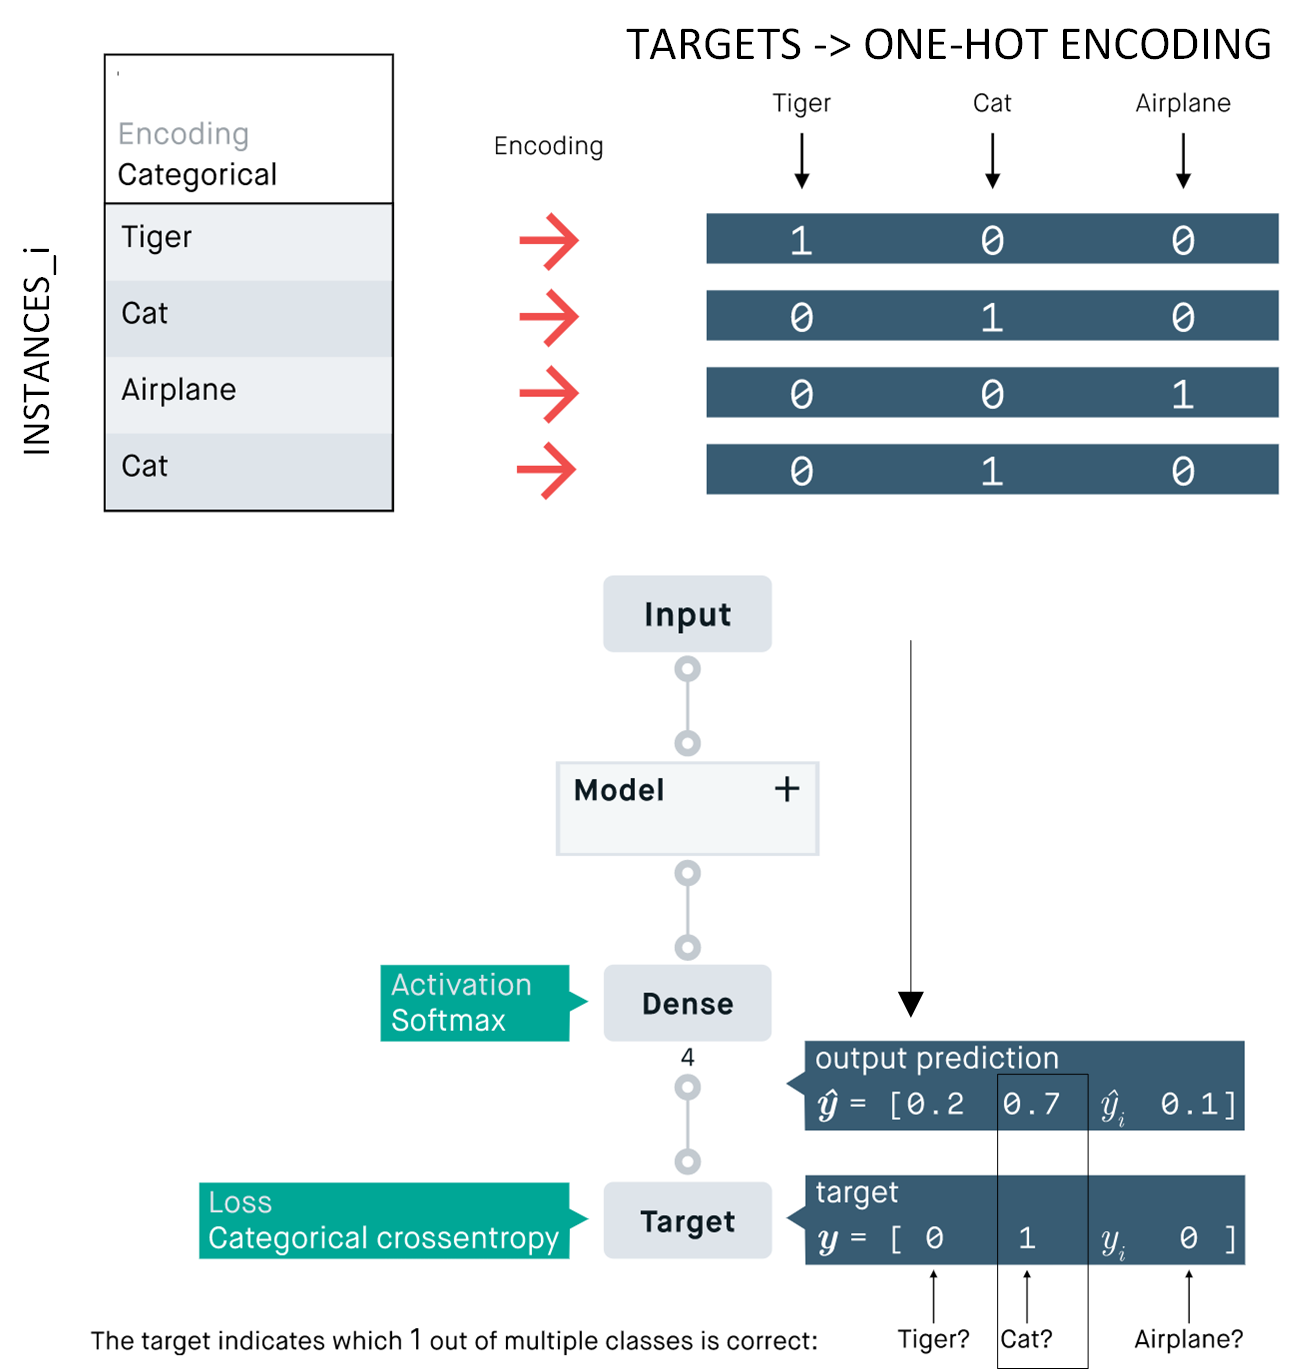

<!-- https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<li><b>Focal Loss</b><ul>
    The extension for Cross-Entropy Loss can be Focal Loss function - which is actually the variation of Cross-Entropy. <u>The advantage Focal Loss that it down-weights the contribution of easy examples and enables the model to focus more on learning hard examples.</u> Thus, it, fore instance, works well for highly imbalanced class task.
    $$ L_i=\sum_{c=0}^{C-1}\alpha_c(1-\hat{y}_{ic})^{\gamma_c} CE = -\sum_{c=0}^{C-1}\alpha_c(1-\hat{y}_{ic})^{\gamma_c} y_{ic}\log(\hat{y}_{ic}),$$
    where:<ul>
    <li> $\alpha_c$ is the weight of class $c$, it can be choose as inverse class frequency;
        <li> $\gamma_c $ is the modulation factor to set the penalty to misclassified instances (so-called hard-negative examples).             
<em>Note</em>:<ul>
    for Binary case we can introduce:
            $$ L_i=\alpha(1-\hat{y}_{i})^{\gamma}y_{i}\log(\hat{y}_{i})+(1-\alpha)\hat{y}_{i}^{\gamma}\log(1-\hat{y}_{i})  $$<ul>
    <li>Positive examples: Target Class or foreground information such as ground-truths.
<li>Negative examples: Non-Target Class or background information such as anchors whose IoU with ground-truths is less than a given threshold.
<li>Easy positives/negatives: Samples classified as positive/negative examples.
<li>Hard positives/negatives: Samples misclassified as negative/positive examples.    
<!--     https://medium.com/visionwizard/understanding-focal-loss-a-quick-read-b914422913e7 -->
            </ul>
            <em>Note</em><ul>
        <li>Hard Examples here are  such as with small ROIs(region of interest).
        <li>Well-classified examples (Easy  examples) need to be down-weighted by $\gamma$. 
            <!--     https://www.researchgate.net/publication/342520628_A_survey_of_loss_functions_for_semantic_segmentation -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<em>Note</em>:<ul>
   <u> In the <b>Multi Label</b> Classification the Binary Loss need to be used for each class</u>:
    <li>It can be BCE Loss,
        <li> It is also can be applied <b>Multilabel SoftMargin Loss in the following form:
        $$   L_i=−y_i\log\left(\frac{1}{1+\exp(-\hat{y}_i))}\right)+ (1-y_i)\log  \left(  \frac{\exp(-\hat{y}_i)}{1+\exp(-\hat{y}_i)} \right),
$$
   where $y_i \in \{0,1\}$ in opposite to simple soft-margin loss $L_i=\log(1+\exp(−y_i\hat{y}_i))\text{ for $y\in\{-1,1\}$}$

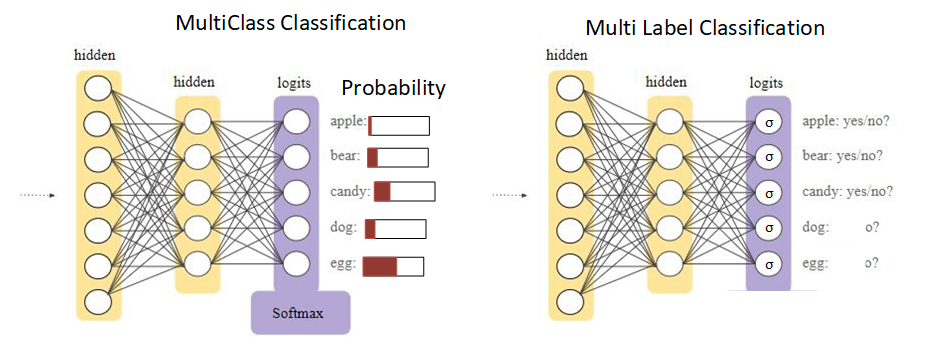
<!-- https://cdn.analyticsvidhya.com/wp-content/uploads/2019/06/soft.jpg.jpg -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
In some cases it is also can be applied label smoothing
      instead of one-hot-encoding <br>
      $p(y|x_i) = \begin{cases} 
    1 & \text{if } y = y_i \\
    0 & \text{otherwise}
\end{cases}$ - one-hot-encoding <br>
it could be introduce <b>label smoothing</b> as<br>
$p^{\prime}(y|x_i) = (1-\varepsilon) p(y|x_i) + \varepsilon u(y|x_i) 
= \begin{cases} 
    1 - \varepsilon + \varepsilon u(y|x_i) & \text{if } y = y_i \\
    \varepsilon u(y|x_i) & \text{otherwise}
\end{cases}
$,<br>
where $\varepsilon \in [0, 1]$, $u(y|x) = \frac{1}{K}$ or uniform distribution and $\sum_{y=1}^{K} p^{\prime}(y|x_i) = 1$.
<br>Modified loss function will be <br>
$L^{\prime} = - \sum_{i=1}^{n} \sum_{y=1}^{K} p^{\prime}(y|x_i) \log q_{\theta}(y|x_i) 
= - \sum_{y=1}^{K} \big[ (1-\varepsilon) p(y|x_i) + \varepsilon u(y|x_i) \big] \log q_{\theta}(y|x_i) =
(1-\varepsilon) H_i(p,q_{\theta}) + \varepsilon H_i(u,q_{\theta}) 
$<BR>
 and $\log q_{\theta}(y|x_i) = \hat{y}_i$; 
    <blockquote><em>Note</em><ul>
        We could see that for each example in the training dataset, the loss contribution is a mixture of the cross entropy between the one-hot encoded distribution and the predicted distribution, and the cross entropy between the noise distribution and the predicted distribution. During training, if the model learns to predict the distribution confidently, will go close to zero, but will increase dramatically. Therefore, with label smoothing, we actually introduced a regularizer to prevent the model from predicting too confidently. 
        <!-- https://leimao.github.io/blog/Label-Smoothing/ -->

### Regression Loss

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<li>    <b>L2Loss (Mean Squared Error, MSE)</b>
    <ul>
The most-popular loss function for regression is the L2 loss:
    $$ L_i = \sum_{k=0}^{K-1}|y_{ik}-\hat{y}_{ik}|^2,$$
    where $K$ is the number of predicted values $\hat{y}_{ik}$; $y_{ik}$ are the groundtruth values.
L2 loss is sensitive to outliers, but gives a stable and closed form solution for small variance (by setting its derivative to 0.)
    </ul>
<li>  <b>L1Loss (Mean Absolute Error, MAE)</b><ul> 
    The main drawback of L2 loss is the lack of robustness for the outliers. thus if it is necessary, For instance, L1 loss can be used:
     $$ L_i = \sum_{k=0}^{K-1}|y_{ik}-\hat{y}_{ik}|.$$
    <ul>
         <ul> It is known than is more robust to outliers, than mean values.</ul>
    <li>The one of the main drawbacks of the L1 loss is that its gradient is the same throughout independent on the value.
        <ul>The gradient will be large even for small loss values. <br>
    To fix this, use dynamic learning rate which decreases when move closer to the minima. </ul> 
    <li>L1 loss is more robust to the outliers, but its derivatives are not continuous, making it hard(inefficient) to find the solution.
        <ul>I.e. it is easy to miss the minimal value </ul>
    </ul>
  
<li> <b>Huber Loss (Smooth L1Loss)</b>:<ul>
 The combination of MSE and MAE gives the Huber Loss, which has L2 behavior in the minimal range and L1 behavior for outliers.
        $$ L_i = \sum_{k=0}^{K-1} \begin{cases}
        \frac{1}{2}(y_{ik}-\hat{y}_{ik})^2\text{ for $|y_{ik}-\hat{y}_{ik}|\leq\delta$} \\
        \delta|y_{ik}-\hat{y}_{ik}|-\frac{1}{2}\delta^2\text{ for $|y_i-\hat{y}_{ik}|>\delta$} \\
        \end{cases}
        $$
The main problem with Huber loss is that we might need to train hyperparameter $\delta$ which is an iterative process.
    <blockquote> <em>Note</em><ul>
       <li> Beside the original Huber Loss, it can be also replaced with <b>log-cosh</b> loss:
        $$ L_i =\sum_{k=0}^{K-1}\log\big(\cosh(y_{ik}-\hat{y}_{ik})\big) $$
        $log(cosh(x))$ is approximately equal to $(x^2) / 2$ for small $x$ and to $abs(x) - log(2)$ for large $x$. This means that $logcosh$ works mostly like the mean squared error, but will not be so strongly affected by the occasional wildly incorrect prediction. 
        <li> Also Huber Loss can be approximated as 
            $$ L_i = \sum_{k=0}^{K-1}\left(\sqrt{1+\frac{|y_{ik}-\hat{y}_{ik}|^2}{\delta^2}}-1\right)$$
<!--     https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0 -->

### Segmentation Loss

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    The Semantic Segmentation task is to label each pixel of an image with a corresponding class of what is being represented.<br>
    For this case the number of segmentation outputs (channels) need to be the same as number of classes.<br>
    In the MultiClass And the probability weighting (for instance, softmax) need to ba taken for ach pixel trough all the channels, 
    $$ softmax(x_{whj})=\frac{\exp(x_{whj})}{\sum_{c=0}^{C-1}\exp(x_{whc})}$$
<em> Notes</em><ul>
    <li>Due to predicting for every pixel in the image, this task is commonly referred to as dense prediction.
    <li>In the Semantic Segmentation  instances of the same class are not separated the things under classification is the category of each pixel. 
     <li> Actually semantic segmentation classes are made as in the one-hot encoding, but each element here is the two-dimension element,
         $$T(y_i) =   \begin{bmatrix}
              instance&class_0&...&class_c&...&class_{C-1}\\
              instance_i&channel_0{W\times H}&...&channel_c{W\times H}&...&channel_{C-1}{W\times H}\\
              \end{bmatrix}$$
    <!-- https://www.jeremyjordan.me/semantic-segmentation/ -->
    <li> For propose of semantic segmentation we can distinguish three groups of loss functions:<ul>
        <li> <b>Cross-Entropy losses</b>, like BCE or categorical CE allow to classify the object as its self $-\log(\hat{y})$;
      <li> <b>Intersection over union</b>, like DICE or Jaccard, allow to classify the small specificity of the shape and position of the object ($dice=2y\cdot\hat{y}/(|y|+|\hat{y}|))$; 
      <li> <b>Boundary loss</b> for edge and contour segmentation, like <b>Hausdorf distance</b> ($ \max_{\hat{y}}\big[\min_{y}(||y-\hat{y}||^2)\big]$). 
          <!-- https://neptune.ai/blog/image-segmentation-in-2020 -->
          <!--     https://www.researchgate.net/publication/342520628_A_survey_of_loss_functions_for_semantic_segmentation -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
The Semantic Segmentation Loss corresponds to the MultiLabel Classification. Thus, we can introduce
<li><b>Pixel-Wise Cross Entropy Loss</b><ul>
    $$ L_i=-\sum_{w=0,h=0}^{W-1,H-1}\sum_{c=0}^{C-1}y_{icwh}\log(\hat{y}_{icwh}),$$
    where<ul>
    <li>$\sum_{w=0,h=0}^{W-1,H-1}$ is the sum through the all pixels of 1 channel.
    <li>$\sum_{c=0}^{C-1}$ is the sum through the all classes i.e. all channel. 
    <li>$y_{icwh}$ is the pixel label i.e. ($0,\ 1$). 
    <li>$\hat{y}_{icwh}$ is the output of network.   
        </ul>
   In some cases, different pixels can have different weights. For instance, we can increase the weights for the edge of the object shapes. Here we increase also the penalty of non-correct edge detection.<ul>
    For <b>weighted Pixelwise CrossEntropy Loss</b> we will have
    $$ L_i=-\sum_{w=0,h=0}^{W-1,H-1}\sum_{c=0}^{C-1}w_{cwh}y_{icwh}\log(\hat{y}_{icwh}),$$
    where $w_{cwh}$ is the weight tensor for all pixels in all output channels (classes).</ul>
<!--     https://www.jeremyjordan.me/semantic-segmentation/ -->
   <br> <em>Note</em><ul>
   <li> Beside of using cross entropy, you may use <b>BCELoss</b> for each pixel as:
    $$ L_i=-\sum_{w=0,h=0}^{W-1,H-1}\left(y_{iwh}\log(\hat{y}_{iwh})-(1-y_{iwh})\log(1-\hat{y}_{iwh})\right),$$
    <li> or <b>weighted BCE loss</b> as:
        $$ L_i=-\sum_{w=0,h=0}^{W-1,H-1}\left(w_{wh}y_{iwh}\log(\hat{y}_{iwh})-(1-y_{iwh})\log(1-\hat{y}_{iwh})\right),$$
    <li> It is also can be applied <b>Balanced BCELoss</b>
        $$ L_i=-\sum_{w=0,h=0}^{W-1,H-1}\left(b_{iwh}y_{iwh}\log(\hat{y}_{iwh})-(1-b_{iwh})(1-y_{iwh})\log(1-\hat{y}_{iwh})\right),$$
        where $b_{iwh} = 1-\frac{{y}_{iwh}}{W\cdot H} $
<!--     https://www.researchgate.net/publication/342520628_A_survey_of_loss_functions_for_semantic_segmentation -->

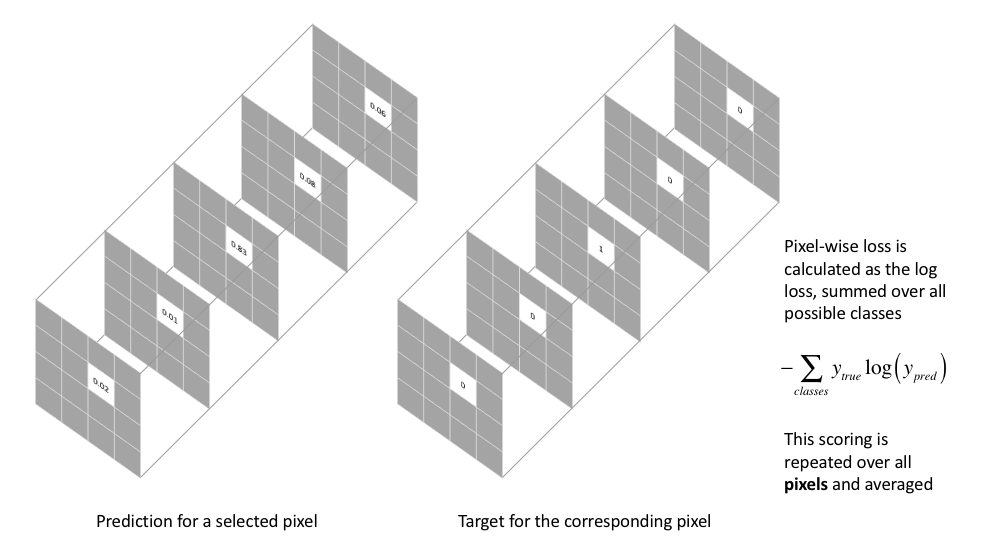

<!-- https://www.jeremyjordan.me/semantic-segmentation/ -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'> Example of semantic segmentation with weights.

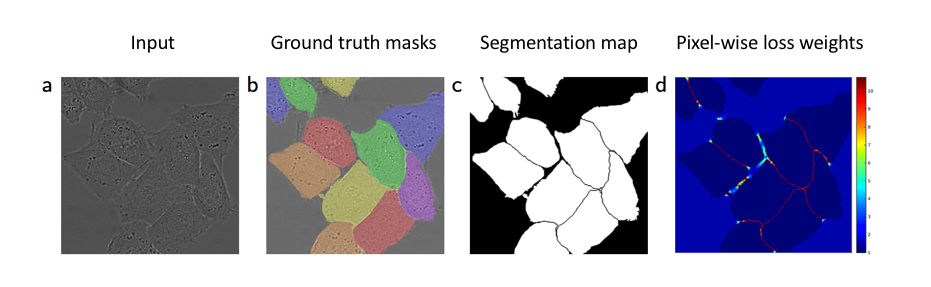
<!-- https://www.jeremyjordan.me/semantic-segmentation/ -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<li><b>Dice Loss (Dice-Serene Coefficient)</b><ul>
    Actually, the main goal of semantic segmentation is to increase the similarity between the target object and the output of the network. The most native way here is trying to increase the <b>Intersection over Union (IoU)</b> between target and predicted objects. <u>This approach allowing to increase as the similarity in position of object as similarity in the shape.</u>  There are exist a several normalized (to range 0-1) measures of IoU, most popular of the is them is the Dice coefficient.
    $$dice_i = \sum_{c=0}^{C-1}\left(1 - 2\frac {y_{ic}\cap \hat{y}_{ic}}{|y_{ic}|+|\hat{y}_{ic}|} \right)= \sum_{c=0}^{C-1}\left(1-2\frac{\text{IoU}}{\text{area}({y}_{ic})+\text{area}(\hat{y}_{ic})}\right),$$
    where $y_{ic}\cap \hat{y}_{ic}$ is the IoU between the class channel and predicted one, for the our use 
    $$ \text{IoU} = y_{ic}\cap \hat{y}_{ic}= \sum_{w=0,h=0}^{W-1,H-1}y_{icwh} \cdot \hat{y}_{icwh} $$
    <!--     https://www.researchgate.net/publication/342520628_A_survey_of_loss_functions_for_semantic_segmentation -->

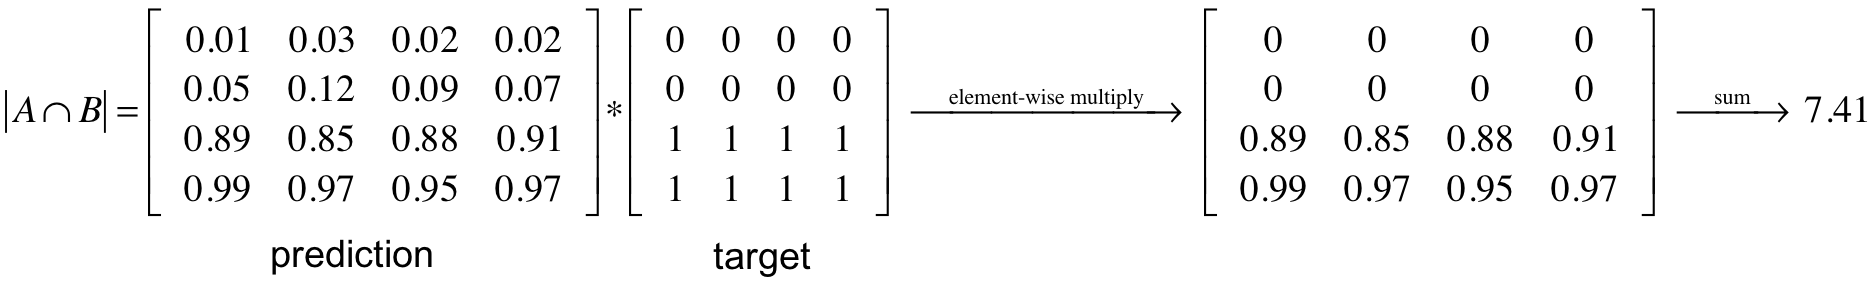

<!-- https://www.jeremyjordan.me/semantic-segmentation/ -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
    <em>Note</em><ul>
    <li> Some authors separate concepts of dice index 
        $$ \text{dice index} = \frac {y_{ic}\cdot \hat{y}_{ic}}{|y_{ic}|+|\hat{y}_{ic}|}$$ 
and dice index (also soft-dice): 
        $$\text{soft dice = dice distance} = 1- \frac {y_{ic}\cdot \hat{y}_{ic}}{|y_{ic}|+|\hat{y}_{ic}|}.$$
    <li> Actually the more computation effective implementation of Dice is calculated as
         $$dice_i = \sum_{c=0}^{C-1}\left(1 - 2\frac {|y_{ic}\cap \hat{y}_{ic}|+1}{|y_{ic}|+|\hat{y}_{ic}| +1} \right),$$
    <li> In some cases Dice is calculated as
         $$dice_i = \sum_{c=0}^{C-1}\left(1 - 2\frac {|y_{ic}\cap \hat{y}_{ic}|}{|y_{ic}|^2+|\hat{y}_{ic}|^2} \right),$$ 
    <li> Frequently Dice and Cross-Entropy are applied together as:
        $$loss_i = w\cdot dice_i + (1-w)ce_i, $$
        where $ce_i$ is the cross-entropy loss (or BCE for binary classification); $w$ is the weight of those factors.
    <li>Beside the Dice, in some cases you may see the popular similar loss function, such that:<ul>
    <li> <b>Jaccard coefficient</b>
        $$ jaccard_i = \sum_{c=0}^{C-1}\left(1 - \frac {|y_{ic}\cap \hat{y}_{ic}|}{|y_{ic}|\cup|\hat{y}_{ic}|} \right)= \sum_{c=0}^{C-1}\left(1 - \frac {|y_{ic}\cup \hat{y}_{ic}|}{|y_{ic}|+|\hat{y}_{ic}|-|y_{ic}\cap \hat{y}_{ic}|}\right) $$
        <li> <b>Tversky Loss</b>
            $$ tversky_i = \sum_{w,h}\sum_{c=0}^{C-1}\left(1 -\frac {y_{i}\hat{y}_{i}}{y_{i}\hat{y}_{i}+\beta(1-y_i)\hat{y}_{i} + (1-\beta)y_i(1-\hat{y}_{i}) }  \right),$$
            where:<ul>
            <li>$y_i = y_{icwh}$; $\hat y_i = \hat y_{icwh}$;
                <li> $\beta$ is the coefficient (hyperparameter), for $\beta=1/2$ $tversky_i = dice_i$.</ul>
        <li> <b>Tversky Focal Loss</b>
            $$ fctversky_i = \sum_{c=0}^{C-1}\alpha_c(1-tversky_{ic})^{\gamma_c}, $$
            where $tversky_{ic} = \frac {y_{ic}\hat{y}_{ic}}{y_{ic}\hat{y}_{ic}+\beta(1-y_{ic})\hat{y}_{ic} + (1-\beta)y_i(1-\hat{y}_{ic})}$
        </ul>
        <li> <b>Sensitive-Specificity Loss</b><ul>
            Actually, we can classify each pixel in the output as $TP$, $TN$ - true positive or true negative, and $FP$ and $FN$ - alse positive and negative.
       In this case (of binary classification) we can rewrite Dice as $dice = 1- 2TP/(2TP+FP+FN)$, where $TP$ is true positive, $FP$ and $FN$ f Thereby we can introduce generalized measure as:
            $$ ssl_i = b\frac{TP_i}{TP_i+FN_i} + (1-b)\frac{TN_i}{TN_i+FP_i} = b\cdot\text{sensitive}_i + (1-b)\cdot\text{specificity}_i,$$
            where $b$ is the weight of this measure.
            <!--     https://www.researchgate.net/publication/342520628_A_survey_of_loss_functions_for_semantic_segmentation -->

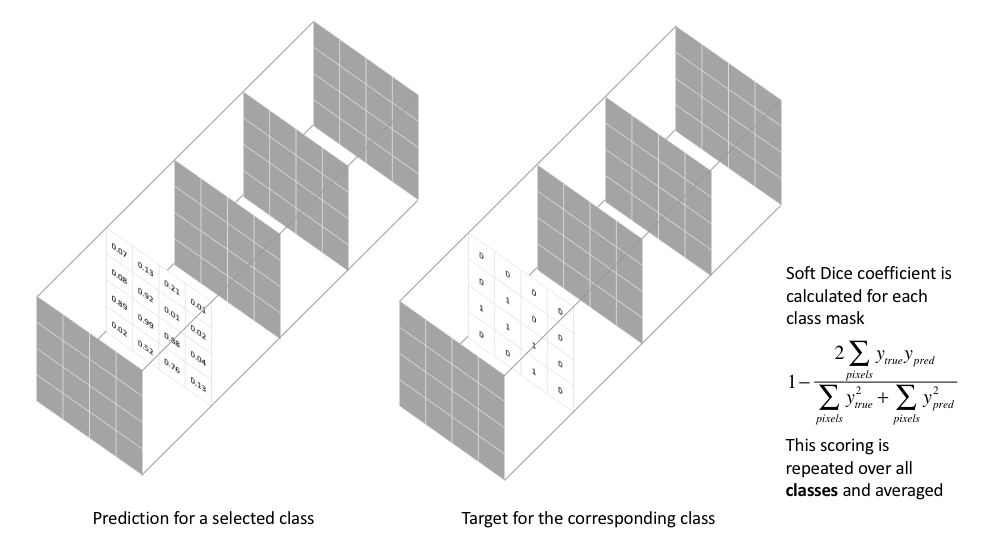

<!-- https://www.jeremyjordan.me/semantic-segmentation/ -->

### Object Detection

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
 As a rule the object detection task in the combination of classification and bound-regression tasks, joined together:
    $$ L_{i} = \alpha L_{cls} + (1-\alpha)L_{box},$$
    where:<ul>
    <li> $ L_{cls}$ is the classification of object loss (frequently categorical cross-entropy, $-\log(\hat{y}_i)$;
    <li> $ L_{box}$ is the loss for boundary box position and size regression task (frequently $L_2$ or $Huber$ i.e. $L_1^{smooth}$).
    <li> $\alpha$ is the weight of both those components.
</ul> 
    <blockquote>
  For instance, for faster-rcnn:
        $$
        \begin{align*}
&\mathcal{L} = \mathcal{L}_\text{cls} + \mathcal{L}_\text{box} =\\\\
&= \frac{1}{N_\text{cls}} \sum_i \mathcal{L}_\text{cls} (\hat{y}_i, y_i) + \frac{\lambda}{N_\text{box}} \sum_i y_i \cdot L_1^\text{smooth}(t_i - t^*_i) \\
\end{align*}, $$
        where:<ul>
        <li> $ \mathcal{L}_\text{cls} (\hat{y}_i, y_i) = - y_i \log \hat{y} - (1 - y_i) \log (1 - \hat{y}_i) $
        <li> $L_1^\text{smooth}(x) = \begin{cases}
                0.5 x^2             & \text{if } \vert x \vert < 1\\
                \vert x \vert - 0.5 & \text{otherwise}
            \end{cases}  $  
        <li> <table class="info">
  <tbody>
    <tr>
      <td><strong>Symbol</strong></td>
      <td><strong>Explanation</strong></td>
    </tr>
    <tr>
      <td>\(\hat{y}_i\)</td>
      <td>Predicted probability of anchor i being an object.</td>
    </tr>
    <tr>
      <td>\(y_i\)</td>
      <td>Ground truth label (binary) of whether anchor i is an object.</td>
    </tr>
    <tr>
      <td>\(t_i\)</td>
      <td>Predicted four parameterized coordinates.</td>
    </tr>
    <tr>
      <td>\(t^*_i\)</td>
      <td>Ground truth coordinates.</td>
    </tr>
    <tr>
      <td>\(N_\text{cls}\)</td>
      <td>Normalization term, set to be mini-batch size (~256) in the paper.</td>
    </tr>
    <tr>
      <td>\(N_\text{box}\)</td>
      <td>Normalization term, set to the number of anchor locations (~2400) in the paper.</td>
    </tr>
    <tr>
      <td>\(\lambda\)</td>
      <td>A balancing parameter, set to be ~10 in the paper (so that both \(\mathcal{L}_\text{cls}\) and \(\mathcal{L}_\text{box}\) terms are roughly equally weighted).</td>
    </tr>
  </tbody>
</table> 
        </ul>
   For mask-rcnn the loss will have third component:
       $$ \mathcal{L} = \mathcal{L}_\text{cls} + \mathcal{L}_\text{box} + \mathcal{L}_\text{mask}, $$
        where: 
        $$\mathcal{L}_\text{mask} = - \frac{1}{w_{\text{ROI}}\cdot h_{\text{ROI}}} \sum_{1 \leq i, j \leq m} \big[ y_{ij} \log \hat{y}^k_{ij} + (1-y_{ij}) \log (1- \hat{y}^k_{ij}) \big], $$
        and $w_{\text{ROI}}, h_{\text{ROI}}$ is the size of region of interested (target instance).
        
<!--         https://lilianweng.github.io/lil-log/2017/12/31/object-recognition-for-dummies-part-3.html -->
<!--         https://lilianweng.github.io/lil-log/2018/12/27/object-detection-part-4.html -->